In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


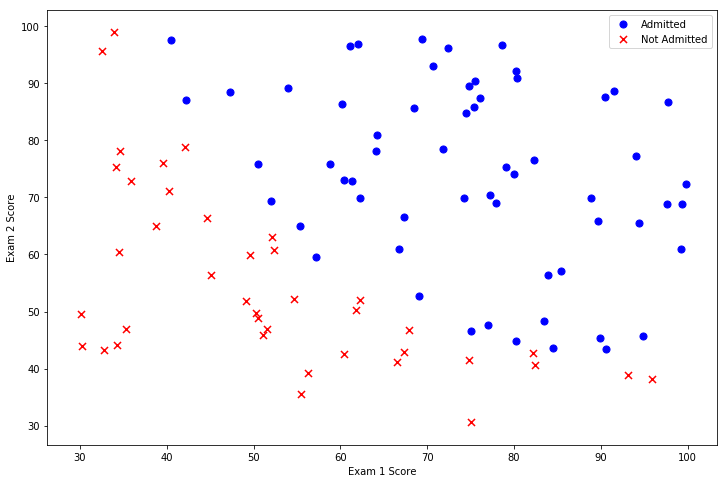

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

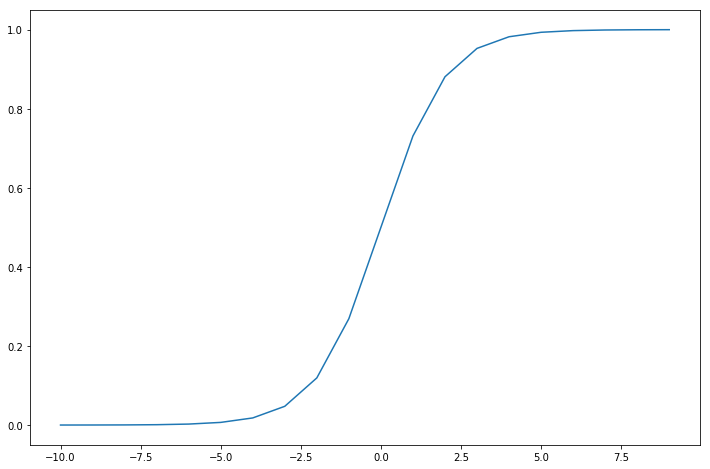

In [5]:
gif, ax = plt.subplots(figsize = (12, 8))
z = np.arange(-10, 10)
ax.plot(z, sigmoid(z))
plt.show()

In [6]:
data_X = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [7]:
data_X.insert(0, 'ones', 1)

In [18]:
X = data_X.values
y = data_y.values
theta = np.zeros(X.shape[1])

In [37]:
def cost(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X @ theta)
    first = -y @ np.log(h)
    second = (1 - y) @ np.log(1 - h)
    return (first - second)/m

In [38]:
cost(theta,X, y)

0.6931471805599453

In [39]:
def gradient(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X @ theta)
    return (X.T @ (h - y)) / m

In [43]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

In [44]:
cost(result[0], X, y)

0.20349770158947475

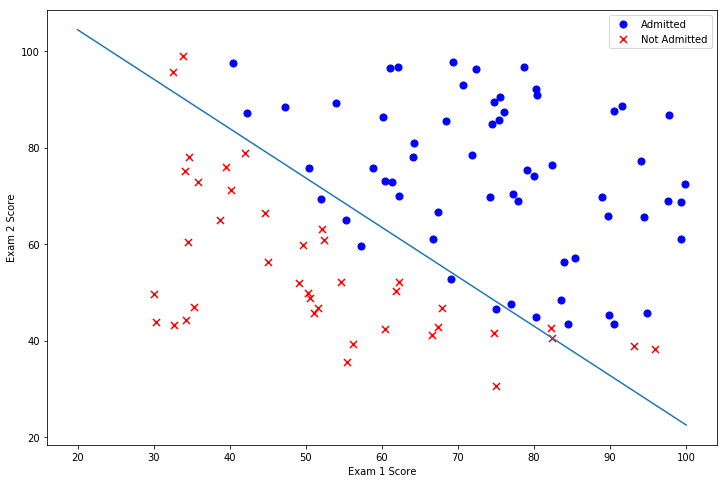

In [45]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
arr =np.arange(20,110,10)
ax.plot(arr, (-result[0][0] - result[0][1] * arr)/result[0][2])
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()